In [1]:
# CARREGANDO AS BIBLIOTECAS:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.tree import plot_tree
from sklearn.tree import DecisionTreeClassifier

from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import plot_confusion_matrix

from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score

# Módulo 07 - Tarefa 02

#### 1) Carregue a base e garanta que a base está como deveria.

Considere a base que você ajustou na lição passada. Carregue-a. Caso ainda haja alguma pendência, ajuste - lembre-se de que o scikitlearn não recebe variáveis em formato string, somente numéricas, e não aceita '*missings*'. 

- Separe 70% da base para treinamento e 30% para validação. Cada uma dessas partes terá dois objetos, um armazenando a variável resposta ```mau```e outro armazenando as variáveis explicativas (lembrando: sem variáveis string, já com as dummies).

In [2]:
df = pd.read_csv('dados_preprocessados.csv') # 
df.head(3)

,Unnamed: 0,qtd_filhos,idade,tempo_emprego,possui_celular,possui_fone_comercial,possui_fone,possui_email,qt_pessoas_residencia,mau,...,educacao_Secondary / secondary special,estado_civil_Married,estado_civil_Separated,estado_civil_Single / not married,estado_civil_Widow,tipo_residencia_House / apartment,tipo_residencia_Municipal apartment,tipo_residencia_Office apartment,tipo_residencia_Rented apartment,tipo_residencia_With parents
0,0,0,58.832877,3.106849,1,0,0,0,2,False,...,1,1,0,0,0,1,0,0,0,0
1,1,0,52.356164,8.358904,1,0,1,1,1,False,...,1,0,0,1,0,1,0,0,0,0
2,3,0,46.224658,2.106849,1,1,1,1,2,False,...,0,1,0,0,0,1,0,0,0,0


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6770 entries, 0 to 6769
Data columns (total 30 columns):
 #   Column                                  Non-Null Count  Dtype  
---  ------                                  --------------  -----  
 0   Unnamed: 0                              6770 non-null   int64  
 1   qtd_filhos                              6770 non-null   int64  
 2   idade                                   6770 non-null   float64
 3   tempo_emprego                           6770 non-null   float64
 4   possui_celular                          6770 non-null   int64  
 5   possui_fone_comercial                   6770 non-null   int64  
 6   possui_fone                             6770 non-null   int64  
 7   possui_email                            6770 non-null   int64  
 8   qt_pessoas_residencia                   6770 non-null   int64  
 9   mau                                     6770 non-null   bool   
 10  sexo_M                                  6770 non-null   int6

In [4]:
y = df.mau

In [5]:
X = df.drop('mau', axis=1).drop('Unnamed: 0', axis=1)

In [6]:
X.head(3)

,qtd_filhos,idade,tempo_emprego,possui_celular,possui_fone_comercial,possui_fone,possui_email,qt_pessoas_residencia,sexo_M,posse_de_veiculo_Y,...,educacao_Secondary / secondary special,estado_civil_Married,estado_civil_Separated,estado_civil_Single / not married,estado_civil_Widow,tipo_residencia_House / apartment,tipo_residencia_Municipal apartment,tipo_residencia_Office apartment,tipo_residencia_Rented apartment,tipo_residencia_With parents
0,0,58.832877,3.106849,1,0,0,0,2,1,1,...,1,1,0,0,0,1,0,0,0,0
1,0,52.356164,8.358904,1,0,1,1,1,0,0,...,1,0,0,1,0,1,0,0,0,0
2,0,46.224658,2.106849,1,1,1,1,2,1,1,...,0,1,0,0,0,1,0,0,0,0


In [8]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=100)

#### 2) Vamos para o modelo:

1. Defina um objeto com a função da árvore de decisão vista em aula.
2. Treine o modelo com os dados que você separou para treinamento.
3. Visualize a árvore. Talvez você queira aumentar um pouco a figura.
4. Produza uma visualização da matriz de classificação (ou matriz de confusão) - coloque os rótulos como "aprovados" e "reprovados" - pois afinal de contas, são essas as decisões que se podem tomar com propostas de crédito.
5. Calcule a acurácia na base de treinamento

In [9]:
clf = DecisionTreeClassifier(random_state=100)
clf = clf.fit(X_train,y_train)
clf

DecisionTreeClassifier(random_state=100)

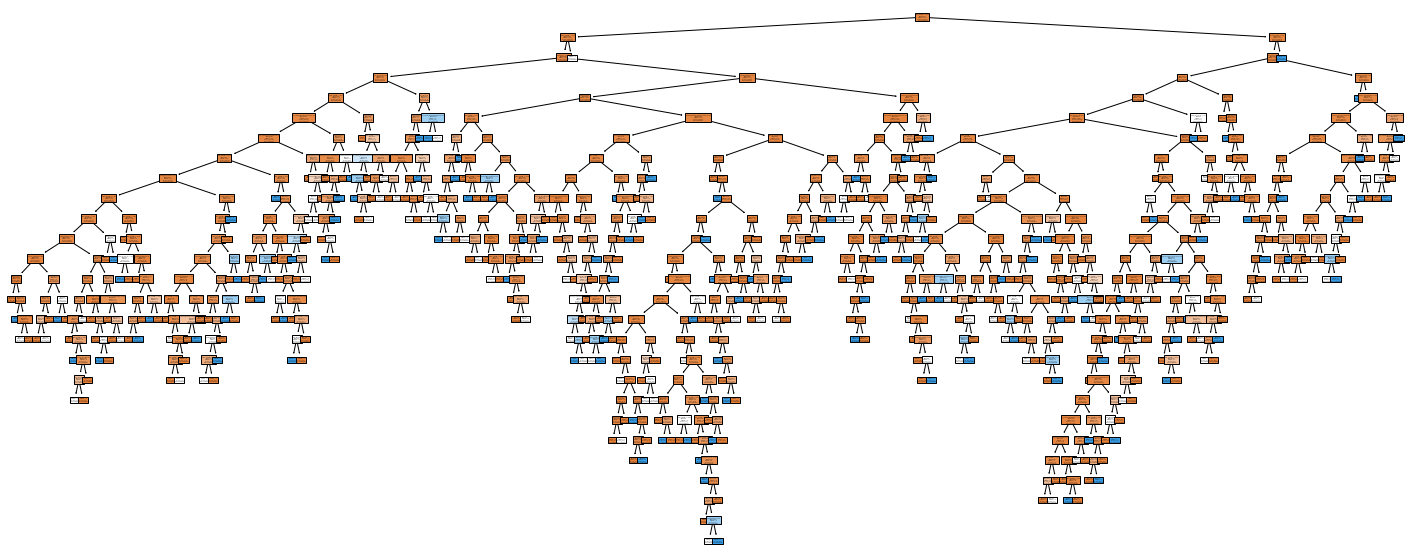

In [10]:
plt.figure(figsize=(25, 10))
plot_tree(clf,
          filled=True,
          class_names=['aprovados', 'reprovados'],
          feature_names=X.columns);

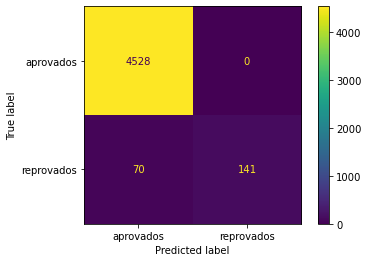

In [11]:
plot_confusion_matrix(clf, X_train, y_train, display_labels=['aprovados', 'reprovados']);

In [12]:
predict_y_train = clf.predict(X_train)
accuracy_score(y_train, predict_y_train)

0.9852289512555391

#### 3) Vamos avaliar o modelo na base de testes

1. Classifique a base de teste de acordo com a árvore que você treinou no item 2.
2. Produza a visualização da matriz de confusão para a base de teste.
3. Calcule a acurácia da base de teste. Compare com a acurácia da base de treinamento.
4. Treine uma nova árvore com número mínimo de observações por folha de 5 e máximo de profundidade de 10. Use o random_state = 123. Avalie a matriz de classificação. Observe a distribuição da predição - qual a proporção de proponentes foram classificados como 'maus'?
5. Como ficaria a acurácia se você classificasse todos os contratos como 'bons'?

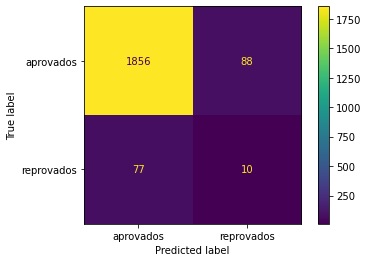

In [13]:
# 1,2)
plot_confusion_matrix(clf, X_test, y_test, display_labels=['aprovados', 'reprovados']);

In [14]:
# 3)
predict_y_test = clf.predict(X_test)
accuracy_score(y_test, predict_y_test)

0.9187592319054653

In [15]:
# 4)Treine uma nova árvore com número mínimo de observações por folha de 5 
# e máximo de profundidade de 10. Use o random_state = 123. Avalie a matriz 
# de classificação. Observe a distribuição da predição - qual a proporção de 
# proponentes foram classificados como 'maus'?

clf2 = DecisionTreeClassifier(max_depth=10, min_samples_leaf=5,random_state=123)
clf2 = clf2.fit(X_train,y_train)
clf2

DecisionTreeClassifier(max_depth=10, min_samples_leaf=5, random_state=123)

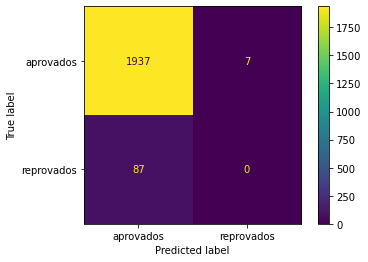

In [16]:
plot_confusion_matrix(clf2, X_test, y_test, display_labels=['aprovados', 'reprovados'])

In [17]:
predict_y_test = clf2.predict(X_test)
accuracy_score(y_test, predict_y_test)

0.9537173806006893

Apesar da acurácia de, aproximadamente, 95,4% na base de teste: 
- foram reprovados 7 "bons pagadores", que deveriam ter sido aprovados
- foram aprovados 87 "maus pagadores", que deveriam ter sido reprovados 
- e não reprovou nenhum dos "maus pagadores" que deveriam ter sido reprovados  

Creio que isso se deve à grande diferença entre o número de "bons e maus 
pagadores":

In [18]:
df.mau.value_counts()

False    6472
True      298
Name: mau, dtype: int64